In [1]:
import sys
if "pyodide" in sys.modules:
    import piplite
    await piplite.install('pyb2d-jupyterlite-backend>=0.4.1')


pyb2d is imported as b2d

In [2]:
import b2d
# import pyb2d_jupyterlite_backend
from pyb2d_jupyterlite_backend.async_jupyter_gui import JupyterAsyncGui
import numpy as np
import matplotlib.pylab as plt

# Tutorial 0: A free falling body
The first step with Box2D is the creation of the world. The world is parametrized by a gravity vector.

In [3]:
# the world
gravity = (0, -10)
world = b2d.World(gravity)

Create a circle-shaped body

In [4]:
# the body def
body_def = b2d.BodyDef()
body_def.type = b2d.BodyType.dynamic
body_def.position = (0, 0)

# the body
body = world.create_body(body_def)

# shape
circle_shape = b2d.CircleShape()
circle_shape.radius = 1.0

# the fixture
fixture_def = b2d.FixtureDef()
fixture_def.shape = circle_shape
fixture_def.density = 1.0

# create and add the fixture to the body
fixture = body.create_fixture(fixture_def)

We can now have a look at the world: We render the world st. each meter in the Box2D world will be 100 pixels in the image:

In [5]:
# from b2d.plot import render_world
b2d.plot.plot_world(world, ppm=100)

Canvas(height=200, width=200)

Lets run the world for a total of 5 seconds. 
Usually one wants to run the world at a certain frame rate.
With the frame rate and the total time we can compute the delta for each iteration and how many steps we need

In [6]:
t = 5
fps = 40
dt = 1.0 / fps
n_steps = int(t / dt + 0.5)
print(f"t={t} fps={fps} dt={dt} n_steps={n_steps}")

t=5 fps=40 dt=0.025 n_steps=200


in each step we query the bodies position and velocity and store then for later plotting

In [7]:
positions = np.zeros([n_steps, 2])
velocites = np.zeros([n_steps, 2])
timepoints = np.zeros([n_steps])

t_elapsed = 0.0
for i in range(n_steps):

    # get the bodies center of mass
    positions[i, :] = body.world_center

    # get the bodies velocity
    velocites[i, :] = body.linear_velocity

    timepoints[i] = t_elapsed

    world.step(time_step=dt, velocity_iterations=1, position_iterations=1)
    t_elapsed += dt

plot the y-position against the time. We can see that the body is falling down in an accelerating way:

plt.plot(timepoints, positions[:, 1])
plt.ylabel('y-poistion [meter]')
plt.xlabel('t [sec]')
plt.show()

as expected the x position is not changing since the gravity vector is non-zero only in the x direction

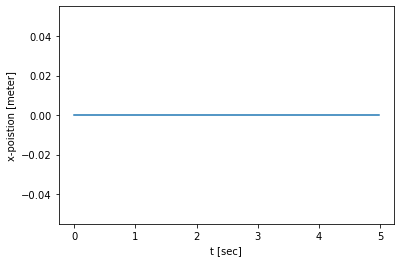

In [8]:
plt.plot(timepoints, positions[:, 0])
plt.ylabel('x-poistion [meter]')
plt.xlabel('t [sec]')
plt.show()

# Tutorial 1: A  falling body in a box, more pythonic
Create a world, but in a more pythonic way, and animate the world

In [15]:
# the world
world = b2d.world(gravity=(0, -10))

# create the dynamic body
body = world.create_dynamic_body(
    position=(5, 5),
    fixtures=b2d.fixture_def(shape=b2d.circle_shape(radius=1), density=1),
)

# create a box
box_shape = b2d.ChainShape()
box_shape.create_loop([(0, 0), (0, 10),(10,10),(10, 0)])
box = world.create_static_body(
    position=(0, 0), fixtures=b2d.fixture_def(shape=box_shape, friction=0)
)
b2d.plot.animate_world(world, ppm=20)

Canvas(height=200, width=200)

note that when we animate that world again, the body has already been fallen

In [16]:
b2d.plot.animate_world(world, ppm=20, fps=20)

Canvas(height=200, width=200)

# Tutorial 2: Interactive worlds
While animating the world already is already nice, interacting with the world is even better.
pyb2d has a framwork to interact with the world for multiple backends.
This framework is called `TestbedBase` since you can "test" your world in an interactive way

In [11]:
from b2d.testbed import TestbedBase

class InteractiveExample(TestbedBase):
    def __init__(self, settings=None):
        super(InteractiveExample, self).__init__(settings=settings)
        # create two balls
        body = self.world.create_dynamic_body(position=(5, 5),
            fixtures=b2d.fixture_def(shape=b2d.circle_shape(radius=1), density=1, restitution=0.5),
        )
        body = self.world.create_dynamic_body(position=(8, 5),
            fixtures=b2d.fixture_def(shape=b2d.circle_shape(radius=1), density=1, restitution=0.8),
        )
        # create a box
        box_shape = b2d.ChainShape()
        box_shape.create_loop([(0, 0), (0, 10),(10,10),(10, 0)])
        box = self.world.create_static_body(
            position=(0, 0), fixtures=b2d.fixture_def(shape=box_shape, friction=0)
        )
        
s = JupyterAsyncGui.Settings()
s.resolution = [300,300]
b2d.testbed.run(InteractiveExample, backend=JupyterAsyncGui, gui_settings=s);

Output()